In [1]:
import pandas as pd


In [2]:
# Sample data
data = {
    'Date': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02'],
    'Category': ['A', 'B', 'A', 'B'],
    'Value': [10, 15, 20, 25]
}

In [3]:
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
# Scenario 1: Basic Pivot Table
pivot_table = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='sum')
# Display the results
print("Scenario 1: Basic Pivot Table")
print(pivot_table)


Scenario 1: Basic Pivot Table
Category     A   B
Date              
2023-01-01  10  15
2023-01-02  20  25


In [6]:
# Scenario 2: Pivot Table with Multiple Aggregations
pivot_table_multiagg = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc=['sum', 'mean'])
print("\nScenario 2: Pivot Table with Multiple Aggregations")
print(pivot_table_multiagg)


Scenario 2: Pivot Table with Multiple Aggregations
           sum     mean    
Category     A   B    A   B
Date                       
2023-01-01  10  15   10  15
2023-01-02  20  25   20  25


In [8]:
# Scenario 3: Pivot Table with Custom Aggregation Function
def custom_agg(series):
    return series.max() - series.min()

pivot_table_customagg = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc=custom_agg)
print("\nScenario 3: Pivot Table with Custom Aggregation Function")
print(pivot_table_customagg)



Scenario 3: Pivot Table with Custom Aggregation Function
Category    A  B
Date            
2023-01-01  0  0
2023-01-02  0  0


In [9]:
# Scenario 4: Pivot Table with Missing Values Handling
pivot_table_fillna = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='sum', fill_value=0)
print("\nScenario 4: Pivot Table with Missing Values Handling")
print(pivot_table_fillna)


Scenario 4: Pivot Table with Missing Values Handling
Category     A   B
Date              
2023-01-01  10  15
2023-01-02  20  25


In [10]:
# Scenario 5: Pivot Table with Margin Totals
pivot_table_margin = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='sum', margins=True)
print("\nScenario 5: Pivot Table with Margin Totals")
print(pivot_table_margin)


Scenario 5: Pivot Table with Margin Totals
Category              A   B  All
Date                            
2023-01-01 00:00:00  10  15   25
2023-01-02 00:00:00  20  25   45
All                  30  40   70


In [15]:
# Sample data
data = {
    'Date': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02'],
    'Category': ['A', 'B', 'A', 'B'],
    'Value': [10, 15, 20, 25]
}

In [17]:
# Scenario 6: Pivot Table with Multi-level Index
pivot_table_multiindex = df.pivot_table(index=['Date', 'Category'], values='Value', aggfunc='sum')


In [18]:
# Scenario 7: Pivot Table with Stacking and Unstacking
pivot_stacked = pivot_table_multiindex.stack()
pivot_unstacked = pivot_stacked.unstack()

In [22]:
# Scenario 8: Pivot Table with Column Renaming
pivot_renamed = pivot_table_multiindex.rename(columns={'Value': 'TotalValue'})


In [25]:
# Scenario 10: Pivot Table with Filtering on Rows and Columns
pivot_filtered = pivot_table_multiindex.loc[pd.IndexSlice[:, ['A']], :]

In [30]:
# Display the results
print("Scenario 6: Pivot Table with Multi-level Index")
print(pivot_table_multiindex)
print("\nScenario 7: Pivot Table with Stacking")
print(pivot_stacked)
print("\nScenario 7: Pivot Table with Unstacking")
print(pivot_unstacked)
print("\nScenario 8: Pivot Table with Column Renaming")
print(pivot_renamed)
print("\nScenario 10: Pivot Table with Filtering")
print(pivot_filtered)

Scenario 6: Pivot Table with Multi-level Index
                     Value
Date       Category       
2023-01-01 A            10
           B            15
2023-01-02 A            20
           B            25

Scenario 7: Pivot Table with Stacking
Date        Category       
2023-01-01  A         Value    10
            B         Value    15
2023-01-02  A         Value    20
            B         Value    25
dtype: int64

Scenario 7: Pivot Table with Unstacking
                     Value
Date       Category       
2023-01-01 A            10
           B            15
2023-01-02 A            20
           B            25

Scenario 8: Pivot Table with Column Renaming
                     TotalValue
Date       Category            
2023-01-01 A                 10
           B                 15
2023-01-02 A                 20
           B                 25

Scenario 10: Pivot Table with Filtering
                     Value
Date       Category       
2023-01-01 A            10
2023-01-02 A

In [31]:
# Scenario 11: Pivot Table with Custom Aggregation and Date Ranges
pivot_date_range = df.pivot_table(index=pd.cut(df['Date'], bins=['2023-01-01', '2023-01-02', '2023-01-03']), columns='Category', values='Value', aggfunc='sum')
print("Scenario 11: Pivot Table with Custom Aggregation and Date Ranges")
print(pivot_date_range)

ValueError: bins must be of datetime64 dtype

In [36]:
# Scenario 12: Pivot Table with Categorical Data and Aggregation
df['Category'] = df['Category'].astype('category')
pivot_categorical = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='sum')
print("\nScenario 12: Pivot Table with Categorical Data and Aggregation")
print(pivot_categorical)



Scenario 12: Pivot Table with Categorical Data and Aggregation
Category     A   B
Date              
2023-01-01  10  15
2023-01-02  20  25


In [37]:
# Scenario 13: Pivot Table with Custom Function and Percentage of Total
def pct_of_total(series):
    return series / series.sum()

pivot_pct_of_total = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc=pct_of_total)
print("\nScenario 13: Pivot Table with Custom Function and Percentage of Total")
print(pivot_pct_of_total)



Scenario 13: Pivot Table with Custom Function and Percentage of Total
Category    A  B
Date            
2023-01-01  1  1
2023-01-02  1  1


In [38]:
# Scenario 14: Pivot Table with Grouping and Multi-level Index
pivot_grouped = df.groupby(['Date', 'Category']).sum().unstack()
print("\nScenario 14: Pivot Table with Grouping and Multi-level Index")
print(pivot_grouped)


Scenario 14: Pivot Table with Grouping and Multi-level Index
           Value    
Category       A   B
Date                
2023-01-01    10  15
2023-01-02    20  25


In [39]:
# Scenario 15: Pivot Table with Stacking and Unstacking (Alternate Method)
pivot_stacked_alt = pivot_grouped.stack()
pivot_unstacked_alt = pivot_stacked_alt.unstack()
print("\nScenario 15: Pivot Table with Stacking (Alternate Method)")
print(pivot_stacked_alt)
print("\nScenario 15: Pivot Table with Unstacking (Alternate Method)")
print(pivot_unstacked_alt)


Scenario 15: Pivot Table with Stacking (Alternate Method)
                     Value
Date       Category       
2023-01-01 A            10
           B            15
2023-01-02 A            20
           B            25

Scenario 15: Pivot Table with Unstacking (Alternate Method)
           Value    
Category       A   B
Date                
2023-01-01    10  15
2023-01-02    20  25


In [40]:
# Scenario 16: Pivot Table with Column Renaming
pivot_renamed = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='sum')
pivot_renamed.columns = ['Category_A_Total', 'Category_B_Total']
print("Scenario 16: Pivot Table with Column Renaming")
print(pivot_renamed)

Scenario 16: Pivot Table with Column Renaming
            Category_A_Total  Category_B_Total
Date                                          
2023-01-01                10                15
2023-01-02                20                25


In [41]:
# Scenario 17: Pivot Table with Custom Sorting
pivot_sorted = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='sum')
pivot_sorted = pivot_sorted[['B', 'A']]
print("\nScenario 17: Pivot Table with Custom Sorting")
print(pivot_sorted)


Scenario 17: Pivot Table with Custom Sorting
Category     B   A
Date              
2023-01-01  15  10
2023-01-02  25  20


In [42]:
# Scenario 18: Pivot Table with Filtering on Rows and Columns
pivot_filtered = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='sum')
pivot_filtered = pivot_filtered.loc[:, ['A']]
print("\nScenario 18: Pivot Table with Filtering on Rows and Columns")
print(pivot_filtered)


Scenario 18: Pivot Table with Filtering on Rows and Columns
Category     A
Date          
2023-01-01  10
2023-01-02  20


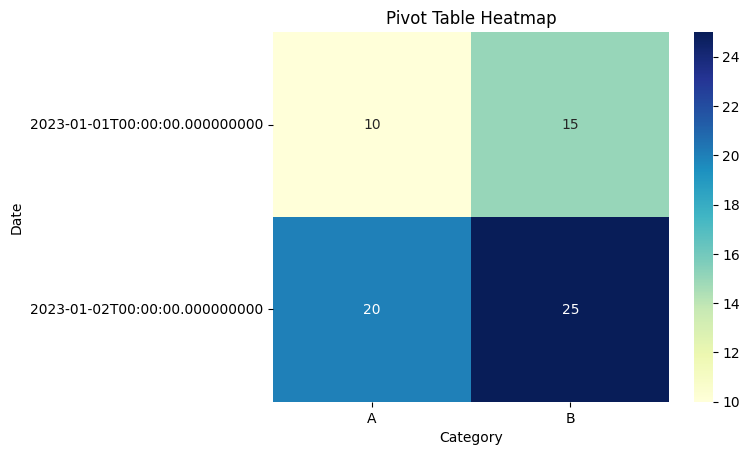

In [43]:
# Scenario 19: Pivot Table with Heatmap Visualization
import seaborn as sns
import matplotlib.pyplot as plt

pivot_heatmap = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='sum')
sns.heatmap(pivot_heatmap, annot=True, cmap='YlGnBu')
plt.title('Pivot Table Heatmap')
plt.show()

In [44]:
# Scenario 20: Pivot Table with Time Resampling
df.set_index('Date', inplace=True)
pivot_resampled = df.resample('D').sum()
print("\nScenario 20: Pivot Table with Time Resampling")
print(pivot_resampled)


Scenario 20: Pivot Table with Time Resampling
            Value
Date             
2023-01-01     25
2023-01-02     45


C:\Users\rvign\AppData\Local\Temp\ipykernel_28948\2320277220.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pivot_resampled = df.resample('D').sum()


In [46]:
# Scenario 21: Pivot Table with Rolling Aggregation
pivot_rolling = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='sum')
pivot_rolling = pivot_rolling.rolling(window=2).sum()
print("Scenario 21: Pivot Table with Rolling Aggregation")
print(pivot_rolling)

Scenario 21: Pivot Table with Rolling Aggregation
Category       A     B
Date                  
2023-01-01   NaN   NaN
2023-01-02  30.0  40.0


In [47]:
# Scenario 22: Pivot Table with NaN Handling and Fill Methods
pivot_nan = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='sum')
pivot_nan.loc['2023-01-02', 'A'] = None
pivot_filled = pivot_nan.fillna(0)
print("\nScenario 22: Pivot Table with NaN Handling and Fill Methods")
print(pivot_filled)


Scenario 22: Pivot Table with NaN Handling and Fill Methods
Category       A   B
Date                
2023-01-01  10.0  15
2023-01-02   0.0  25


In [51]:
df.head(5)

,Category,Value
Date,,
2023-01-01,A,10
2023-01-01,B,15
2023-01-02,A,20
2023-01-02,B,25


In [48]:
# Scenario 23: Pivot Table with Aggregation by Quarter and Year
pivot_quarterly = df.pivot_table(index=df['Date'].dt.to_period('Q'), columns='Category', values='Value', aggfunc='sum')
pivot_yearly = df.pivot_table(index=df['Date'].dt.to_period('Y'), columns='Category', values='Value', aggfunc='sum')
print("\nScenario 23: Pivot Table with Aggregation by Quarter")
print(pivot_quarterly)

KeyError: 'Date'

In [49]:
# Scenario 24: Pivot Table with Grand Total Calculations
pivot_grand_total = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='sum', margins=True)
print("\nScenario 24: Pivot Table with Grand Total Calculations")
print(pivot_grand_total)

KeyError: "['Date'] not in index"

In [50]:
# Scenario 25: Pivot Table with Conditional Formatting
pivot_formatted = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='sum')
pivot_formatted = pivot_formatted.style.highlight_max(axis=1)
print("\nScenario 25: Pivot Table with Conditional Formatting")
# Styling applied when displaying the DataFrame
pivot_formatted


Scenario 25: Pivot Table with Conditional Formatting


Category,A,B
Date,,
2023-01-01 00:00:00,10,15
2023-01-02 00:00:00,20,25


In [53]:
# Scenario 26: Pivot Table with Percentage Change Calculation
pivot_pct_change = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='sum')
pivot_pct_change = pivot_pct_change.pct_change()
print("Scenario 26: Pivot Table with Percentage Change Calculation")
print(pivot_pct_change)

Scenario 26: Pivot Table with Percentage Change Calculation
Category      A         B
Date                     
2023-01-01  NaN       NaN
2023-01-02  1.0  0.666667


In [54]:
# Scenario 27: Pivot Table with Cumulative Sum
pivot_cumsum = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='sum')
pivot_cumsum = pivot_cumsum.cumsum()
print("\nScenario 27: Pivot Table with Cumulative Sum")
print(pivot_cumsum)


Scenario 27: Pivot Table with Cumulative Sum
Category     A   B
Date              
2023-01-01  10  15
2023-01-02  30  40


In [55]:
# Scenario 28: Pivot Table with Cross Tabulation
cross_tab = pd.crosstab(index=df['Date'], columns=df['Category'], values=df['Value'], aggfunc='sum')
print("\nScenario 28: Pivot Table with Cross Tabulation")
print(cross_tab)

KeyError: 'Date'

In [ ]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 250.0/250.0 kB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
# Scenario 29: Pivot Table with Export to Excel or CSV
pivot_export = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='sum')
pivot_export.to_excel('output-contends/pivot_table.xlsx')
pivot_export.to_csv('output-contends/pivot_table.csv')

In [59]:
# Sample data
data = {
    'Date': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02'],
    'Category': ['A', 'B', 'A', 'B'],
    'Value': [10, 15, 20, 25],
    'Quantity': [2, 3, 4, 5]
}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

In [60]:
# Scenario 31: Pivot Table with Multi-level Columns
pivot_multi_level_cols = df.pivot_table(index='Date', columns=['Category', 'Value'], values='Quantity', aggfunc='sum')
print("Scenario 31: Pivot Table with Multi-level Columns")
print(pivot_multi_level_cols)

Scenario 31: Pivot Table with Multi-level Columns
Category      A         B     
Value        10   20   15   25
Date                          
2023-01-01  2.0  NaN  3.0  NaN
2023-01-02  NaN  4.0  NaN  5.0


In [61]:
# Scenario 32: Pivot Table with Custom Aggregation Functions per Column
pivot_custom_agg_per_col = df.pivot_table(index='Date', columns='Category', values=['Value', 'Quantity'], aggfunc={'Value': 'sum', 'Quantity': 'mean'})
print("\nScenario 32: Pivot Table with Custom Aggregation Functions per Column")
print(pivot_custom_agg_per_col)


Scenario 32: Pivot Table with Custom Aggregation Functions per Column
           Quantity    Value    
Category          A  B     A   B
Date                            
2023-01-01        2  3    10  15
2023-01-02        4  5    20  25


In [62]:
# Scenario 33: Pivot Table with Hierarchical Index and Aggregation
pivot_hierarchical_index = df.pivot_table(index=['Date', 'Category'], values='Value', aggfunc='sum')
print("\nScenario 33: Pivot Table with Hierarchical Index and Aggregation")
print(pivot_hierarchical_index)


Scenario 33: Pivot Table with Hierarchical Index and Aggregation
                     Value
Date       Category       
2023-01-01 A            10
           B            15
2023-01-02 A            20
           B            25


In [63]:
# Scenario 34: Pivot Table with Custom Date Resampling and Aggregation
pivot_custom_resampling = df.pivot_table(index=df['Date'].resample('M').max(), columns='Category', values='Value', aggfunc='sum')
print("\nScenario 34: Pivot Table with Custom Date Resampling and Aggregation")
print(pivot_custom_resampling)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [64]:
# Scenario 35: Pivot Table with Custom Aggregation for Specific Time Periods
def custom_agg_period(series):
    return series.sum() / len(series)

pivot_custom_agg_period = df.pivot_table(index=df['Date'].dt.to_period('M'), columns='Category', values='Value', aggfunc=custom_agg_period)
print("\nScenario 35: Pivot Table with Custom Aggregation for Specific Time Periods")
print(pivot_custom_agg_period)


Scenario 35: Pivot Table with Custom Aggregation for Specific Time Periods
Category   A   B
Date            
2023-01   15  20


In [65]:
# Sample data
data = {
    'Date': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02'],
    'Category': ['A', 'B', 'A', 'B'],
    'Value': [10, 15, 20, 25],
    'Quantity': [2, 3, 4, 5]
}

In [66]:
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

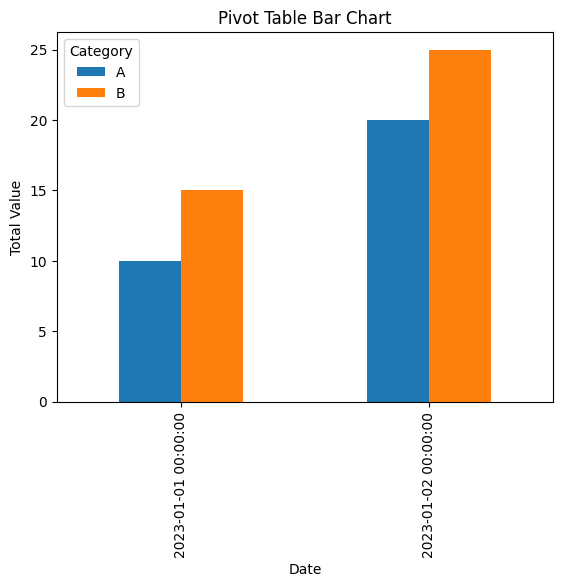

In [67]:
# Scenario 36: Pivot Table with Bar Chart Visualization
pivot_bar = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='sum')
pivot_bar.plot(kind='bar')
plt.title('Pivot Table Bar Chart')
plt.xlabel('Date')
plt.ylabel('Total Value')
plt.show()

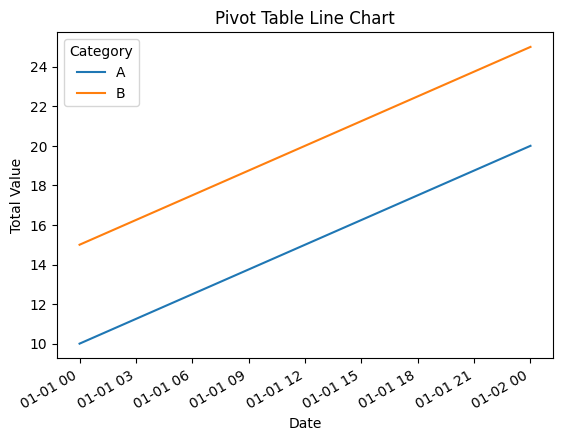

In [68]:
# Scenario 37: Pivot Table with Line Chart Visualization
pivot_line = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='sum')
pivot_line.plot(kind='line')
plt.title('Pivot Table Line Chart')
plt.xlabel('Date')
plt.ylabel('Total Value')
plt.show()


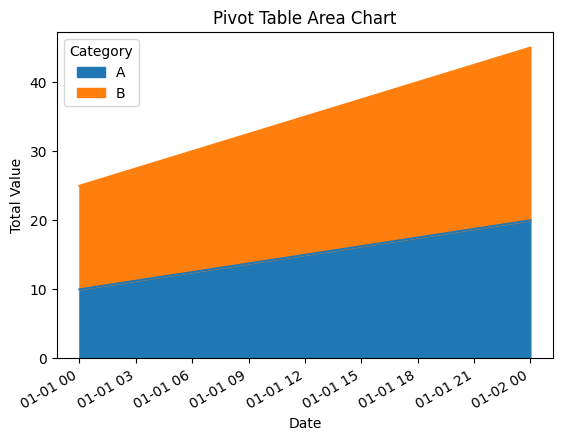

In [69]:
# Scenario 38: Pivot Table with Area Chart Visualization
pivot_area = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='sum')
pivot_area.plot(kind='area')
plt.title('Pivot Table Area Chart')
plt.xlabel('Date')
plt.ylabel('Total Value')
plt.show()

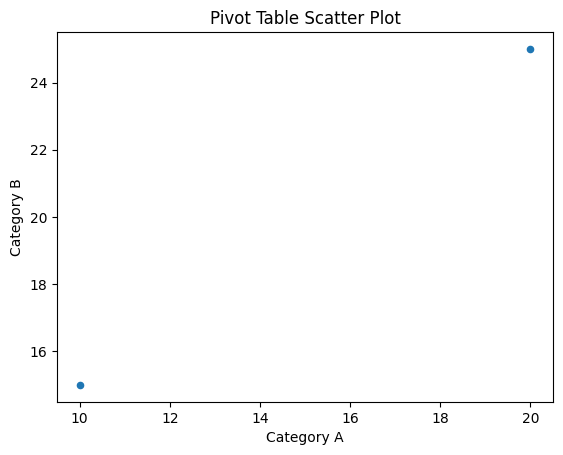

In [70]:
# Scenario 39: Pivot Table with Scatter Plot Visualization
pivot_scatter = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='sum')
pivot_scatter.plot(kind='scatter', x='A', y='B')
plt.title('Pivot Table Scatter Plot')
plt.xlabel('Category A')
plt.ylabel('Category B')
plt.show()

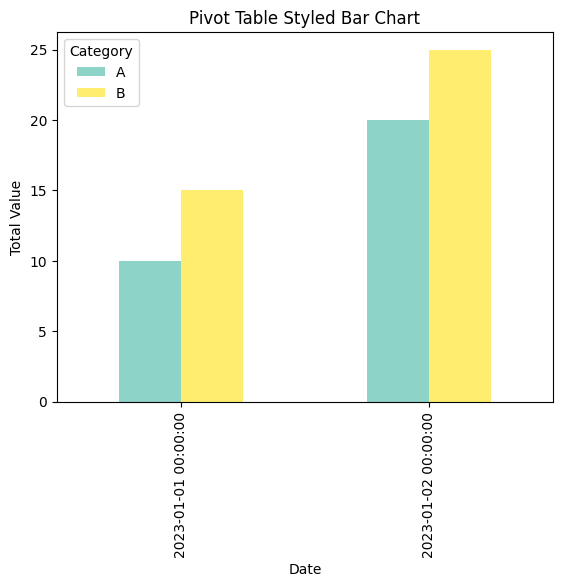

In [71]:
# Scenario 40: Pivot Table with Custom Plot Styling and Themes
pivot_styled = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='sum')
pivot_styled.plot(kind='bar', colormap='Set3')
plt.title('Pivot Table Styled Bar Chart')
plt.xlabel('Date')
plt.ylabel('Total Value')
plt.show()

In [72]:
# Sample data
data = {
    'Date': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02', '2023-01-03', '2023-01-03'],
    'Category': ['A', 'B', 'A', 'B', 'A', 'B'],
    'Value': [10, 15, 20, 25, 30, 35],
    'Quantity': [2, 3, 4, 5, 6, 7]
}

In [73]:
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

In [74]:
# Scenario 41: Pivot Table with Rolling Mean and Standard Deviation
pivot_rolling_mean = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='sum')
pivot_rolling_mean = pivot_rolling_mean.rolling(window=2).mean()
print("Scenario 41: Pivot Table with Rolling Mean")
print(pivot_rolling_mean)

Scenario 41: Pivot Table with Rolling Mean
Category       A     B
Date                  
2023-01-01   NaN   NaN
2023-01-02  15.0  20.0
2023-01-03  25.0  30.0


In [75]:
pivot_rolling_std = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='sum')
pivot_rolling_std = pivot_rolling_std.rolling(window=2).std()

In [76]:
# Scenario 42: Pivot Table with Time-based Resampling and Aggregation
pivot_resample = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='sum')
pivot_resample = pivot_resample.resample('D').sum()
print("\nScenario 42: Pivot Table with Time-based Resampling and Aggregation")
print(pivot_resample)


Scenario 42: Pivot Table with Time-based Resampling and Aggregation
Category     A   B
Date              
2023-01-01  10  15
2023-01-02  20  25
2023-01-03  30  35


In [77]:
# Scenario 43: Pivot Table with Moving Averages and Exponential Smoothing
pivot_moving_average = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='sum')
pivot_moving_average = pivot_moving_average.rolling(window=2).mean()
print("\nScenario 43: Pivot Table with Moving Averages")
print(pivot_moving_average)


Scenario 43: Pivot Table with Moving Averages
Category       A     B
Date                  
2023-01-01   NaN   NaN
2023-01-02  15.0  20.0
2023-01-03  25.0  30.0


In [78]:
# Scenario 44: Pivot Table with Time Shifts and Lagged Aggregation
pivot_shifted = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='sum')
pivot_shifted = pivot_shifted.shift(periods=1)
print("\nScenario 44: Pivot Table with Time Shifts")
print(pivot_shifted)


Scenario 44: Pivot Table with Time Shifts
Category       A     B
Date                  
2023-01-01   NaN   NaN
2023-01-02  10.0  15.0
2023-01-03  20.0  25.0


In [79]:
# Scenario 45: Pivot Table with Time-based Grouping and Aggregation
pivot_time_group = df.pivot_table(index=[df['Date'].dt.hour, df['Date'].dt.minute], columns='Category', values='Value', aggfunc='sum')
print("\nScenario 45: Pivot Table with Time-based Grouping and Aggregation")
print(pivot_time_group)


Scenario 45: Pivot Table with Time-based Grouping and Aggregation
Category    A   B
Date Date        
0    0     60  75


In [83]:
# Sample data
data = {
    'Date': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02', '2023-01-03', '2023-01-03'],
    'Category': ['A', 'B', 'A', 'B', 'A', 'B'],
    'Value': [10, 15, 20, 25, 30, 35],
    'Weight': [2, 3, 4, 5, 6, 7]
}

In [84]:
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

In [86]:
# Scenario 46: Pivot Table with Weighted Average Calculation
def weighted_average(series):
    return (series['Value'] * series['Weight']).sum() / series['Weight'].sum()
pivot_weighted_avg = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc=weighted_average)
print("Scenario 46: Pivot Table with Weighted Average Calculation")
print(pivot_weighted_avg)


KeyError: 'Value'

In [88]:
# Scenario 47: Pivot Table with Custom Aggregation and Condition Filtering
def custom_agg_condition(series):
    return series[series >= 25].sum()
pivot_agg_condition = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc=custom_agg_condition)
print("\nScenario 47: Pivot Table with Custom Aggregation and Condition Filtering")
print(pivot_agg_condition)


Scenario 47: Pivot Table with Custom Aggregation and Condition Filtering
Category     A   B
Date              
2023-01-01   0   0
2023-01-02   0  25
2023-01-03  30  35


In [89]:
# Scenario 48: Pivot Table with Custom Aggregation and Multiple Conditions
def custom_agg_multi_condition(series):
    return series[(series >= 20) & (series <= 30)].sum()
pivot_agg_multi_condition = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc=custom_agg_multi_condition)
print("\nScenario 48: Pivot Table with Custom Aggregation and Multiple Conditions")
print(pivot_agg_multi_condition)



Scenario 48: Pivot Table with Custom Aggregation and Multiple Conditions
Category     A   B
Date              
2023-01-01   0   0
2023-01-02  20  25
2023-01-03  30   0


In [90]:
# Scenario 49: Pivot Table with Custom Aggregation for Financial Data (OHLC)
data_ohlc = {
    'Date': ['2023-01-01', '2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02', '2023-01-02'],
    'Category': ['A', 'A', 'A', 'A', 'A', 'A'],
    'Open': [50, 52, 55, 60, 58, 63],
    'High': [55, 60, 60, 65, 62, 68],
    'Low': [48, 50, 53, 58, 56, 60],
    'Close': [52, 58, 57, 62, 60, 65]
}

df_ohlc = pd.DataFrame(data_ohlc)
df_ohlc['Date'] = pd.to_datetime(df_ohlc['Date'])

pivot_ohlc = df_ohlc.pivot_table(index='Date', columns='Category', values=['Open', 'High', 'Low', 'Close'], aggfunc='sum')
print("\nScenario 49: Pivot Table with Custom Aggregation for Financial Data (OHLC)")
print(pivot_ohlc)


Scenario 49: Pivot Table with Custom Aggregation for Financial Data (OHLC)
           Close High  Low Open
Category       A    A    A    A
Date                           
2023-01-01   167  175  151  157
2023-01-02   187  195  174  181


In [91]:
# Scenario 50: Pivot Table with User-defined Function for Aggregation
def custom_agg_function(series):
    return series.diff().sum()

pivot_custom_agg_function = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc=custom_agg_function)
print("\nScenario 50: Pivot Table with User-defined Function for Aggregation")
print(pivot_custom_agg_function)


Scenario 50: Pivot Table with User-defined Function for Aggregation
Category    A  B
Date            
2023-01-01  0  0
2023-01-02  0  0
2023-01-03  0  0


In [92]:
# Sample data
data = {
    'Date': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02', '2023-01-03', '2023-01-03'],
    'Category': ['A', 'B', 'A', 'B', 'A', 'B'],
    'Description': ['Good', 'Average', 'Excellent', 'Good', 'Excellent', 'Average']
}

In [93]:
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

In [103]:
# Scenario 51: Pivot Table with Text Data and Aggregation
pivot_text_agg = df.pivot_table(index='Date', columns='Category', values='Description', aggfunc='first')
print("Scenario 51: Pivot Table with Text Data and Aggregation")
print(pivot_text_agg)

Scenario 51: Pivot Table with Text Data and Aggregation
Category            A        B
Date                          
2023-01-01       Good  Average
2023-01-02  Excellent     Good
2023-01-03  Excellent  Average


In [104]:
# Scenario 52: Pivot Table with Text Data and Custom Aggregation Functions
def custom_text_agg(series):
    return ', '.join(series)

pivot_custom_text_agg = df.pivot_table(index='Date', columns='Category', values='Description', aggfunc=custom_text_agg)
print("\nScenario 52: Pivot Table with Text Data and Custom Aggregation Functions")
print(pivot_custom_text_agg)


Scenario 52: Pivot Table with Text Data and Custom Aggregation Functions
Category            A        B
Date                          
2023-01-01       Good  Average
2023-01-02  Excellent     Good
2023-01-03  Excellent  Average


In [105]:
# Scenario 53: Pivot Table with Text Data and String Concatenation
pivot_concat = df.pivot_table(index='Date', columns='Category', values='Description', aggfunc=lambda x: ', '.join(x))
print("\nScenario 53: Pivot Table with Text Data and String Concatenation")
print(pivot_concat)


Scenario 53: Pivot Table with Text Data and String Concatenation
Category            A        B
Date                          
2023-01-01       Good  Average
2023-01-02  Excellent     Good
2023-01-03  Excellent  Average


In [106]:
# Scenario 54: Pivot Table with Text Data and Word Frequency Count
pivot_word_freq = df.pivot_table(index='Date', columns='Category', values='Description', aggfunc='count')
print("\nScenario 54: Pivot Table with Text Data and Word Frequency Count")
print(pivot_word_freq)


Scenario 54: Pivot Table with Text Data and Word Frequency Count
Category    A  B
Date            
2023-01-01  1  1
2023-01-02  1  1
2023-01-03  1  1


In [108]:
# Scenario 55: Pivot Table with Text Data and Regular Expression Aggregation
import re
def regex_agg(series):
    return ','.join(re.findall(r'[A-Za-z]+', ' '.join(series)))
pivot_regex_agg = df.pivot_table(index='Date', columns='Category', values='Description', aggfunc=regex_agg)
print("\nScenario 55: Pivot Table with Text Data and Regular Expression Aggregation")
print(pivot_regex_agg)


Scenario 55: Pivot Table with Text Data and Regular Expression Aggregation
Category            A        B
Date                          
2023-01-01       Good  Average
2023-01-02  Excellent     Good
2023-01-03  Excellent  Average
